# An-Cockrell model reimplementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools

import an_cockrell

In [2]:
model = an_cockrell.AnCockrellModel(
    GRID_WIDTH=50,
    GRID_HEIGHT=50,
    BAT=False,
    INIT_DCS=50,
    INIT_MACROS=50,
    INIT_NKS=25,
)

* Blue Squares = Healthy Epithelial Cells
* Yellow Squares = Infected Epithelial Cells
* Grey Squares = Epithelial Cells killed by necrosis
* Grey Pentagons = Epithelial Cells killed by apoptosis
* Green Circles = Macrophages
* Large Green Circles = Macrophages at phagocytosis limit
* Orange Circles = NK Cells
* Light Blue Triangles = Dendritic Cells
* Pink Square Outlines = Activated Endothelial Cells
* Small White Circles = PMNs

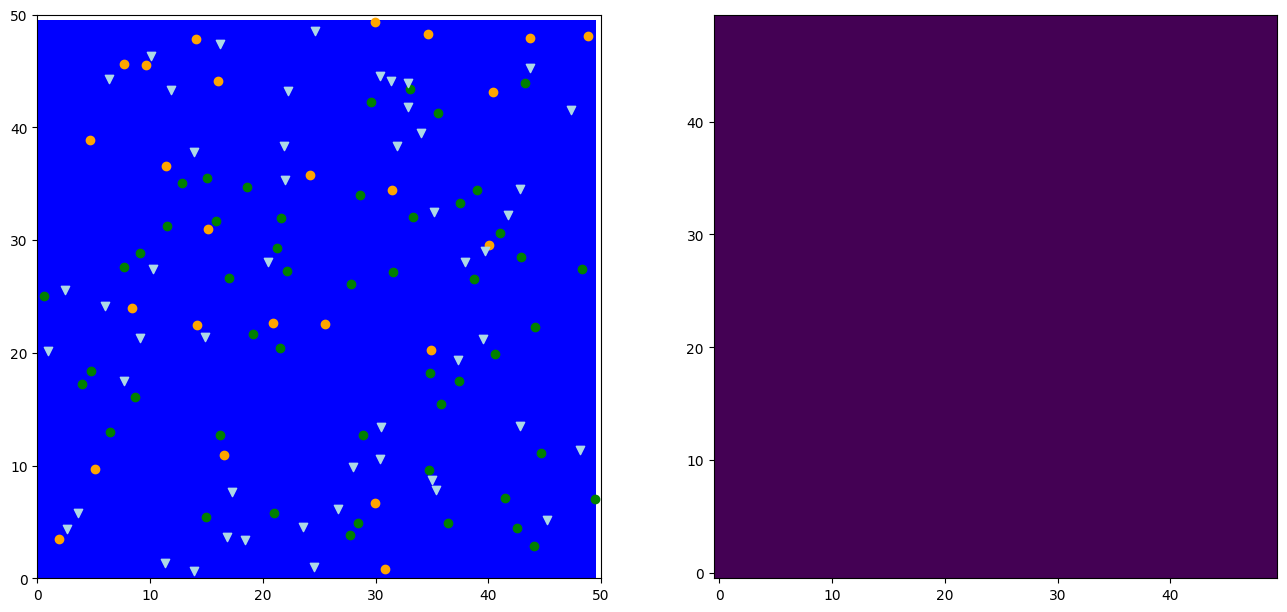

In [3]:

fig, axs = plt.subplots(1, 2,figsize=(16,8))

model.plot_agents(axs[0])
model.plot_field(axs[1], field_name='extracellular_virus')


axs[0].set_aspect(1)
axs[1].set_aspect(1)

In [4]:
model.infect(init_inoculum=150) # Initial-inoculum from 25-150 increments of 25, run for 14 days (2016 steps)

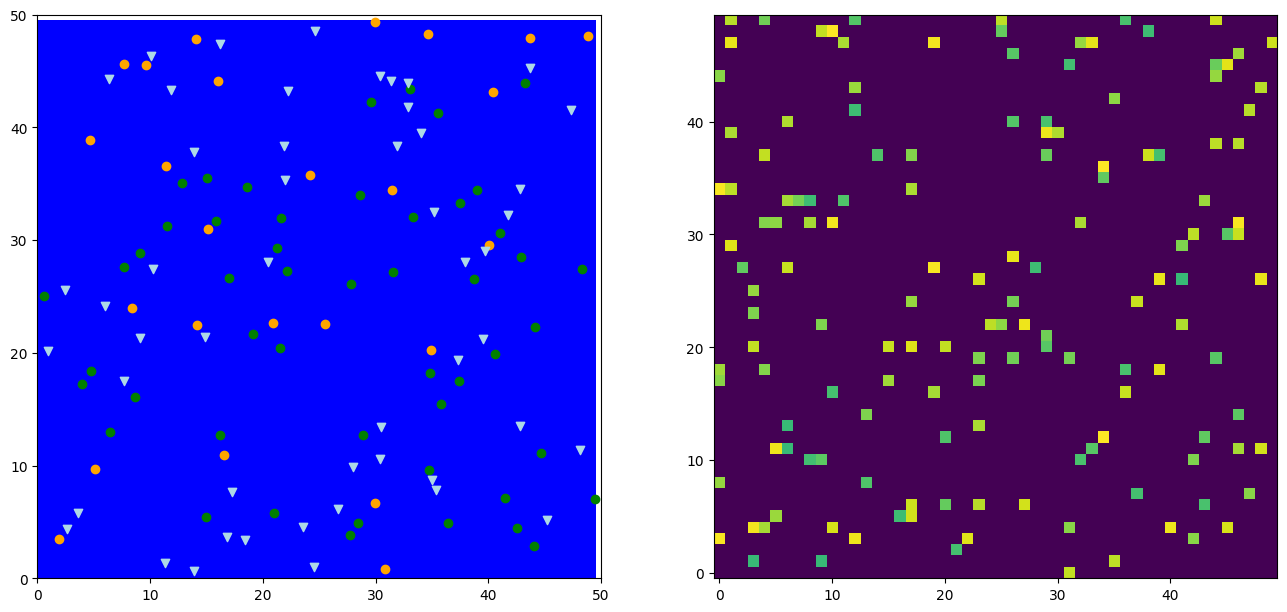

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

model.plot_agents(axs[0])
model.plot_field(axs[1], field_name='extracellular_virus')


axs[0].set_aspect(1)
axs[1].set_aspect(1)

/tmp/ipykernel_534995/3046104661.py:44: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_534995/3046104661.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


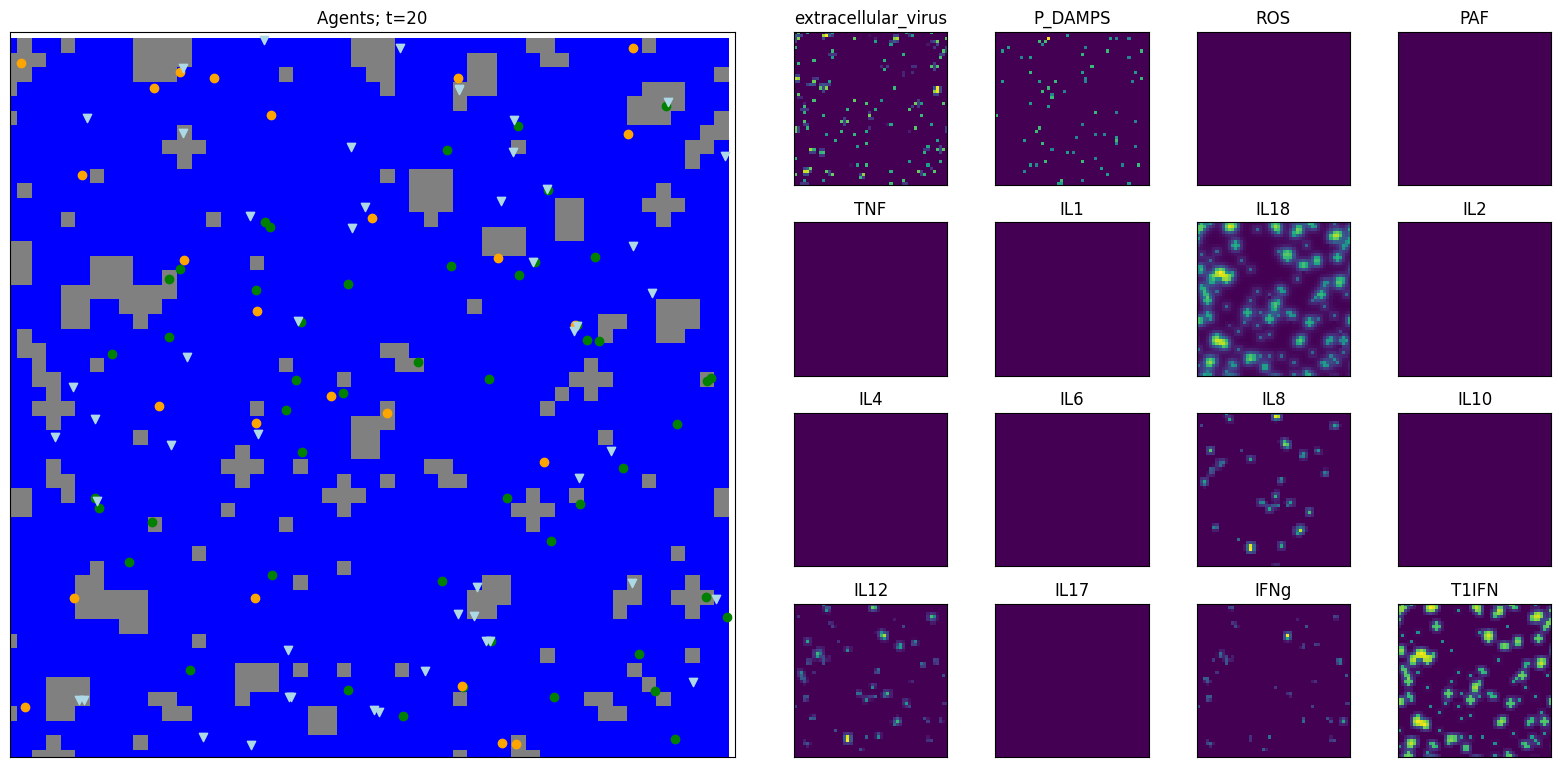

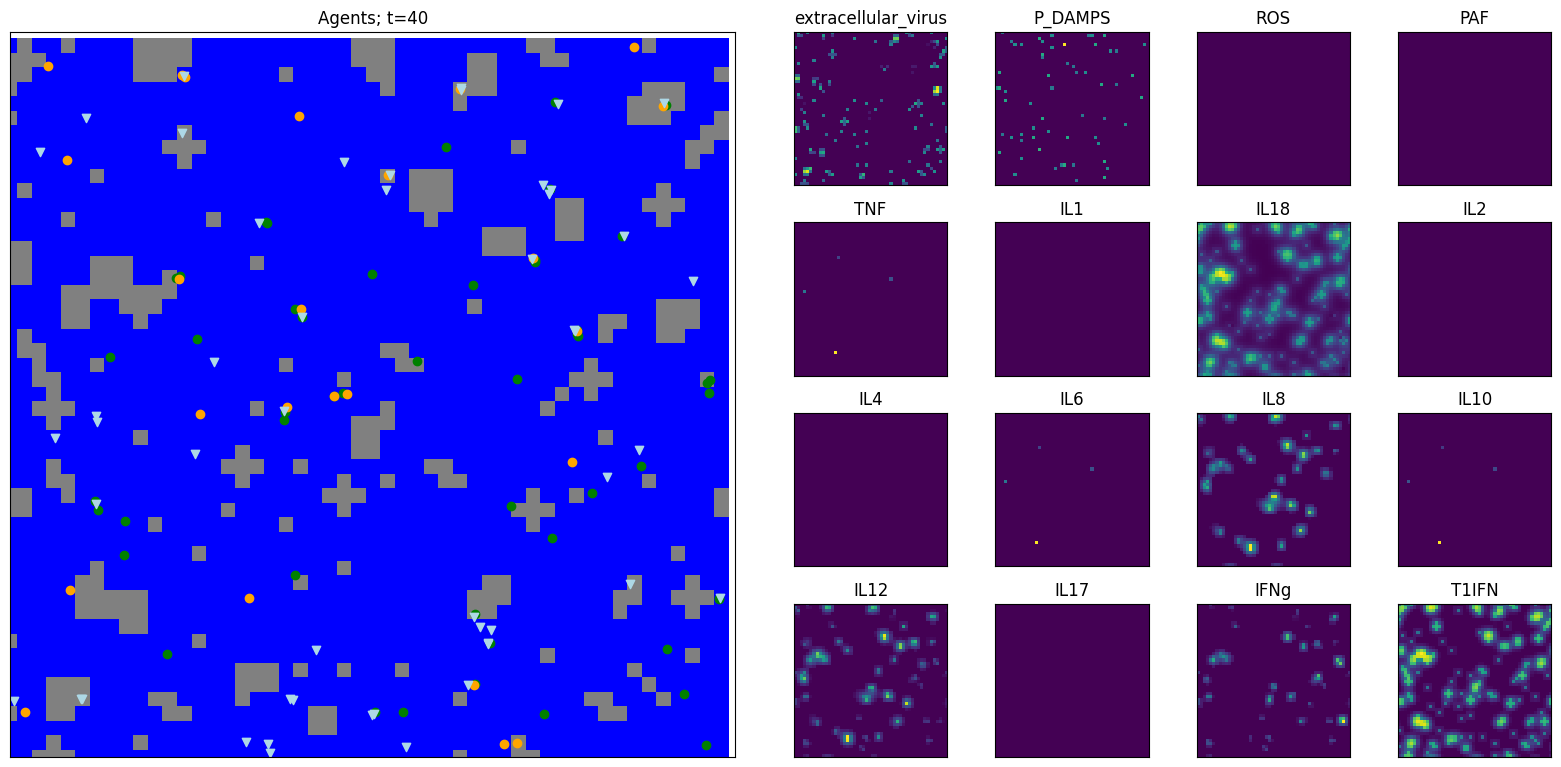

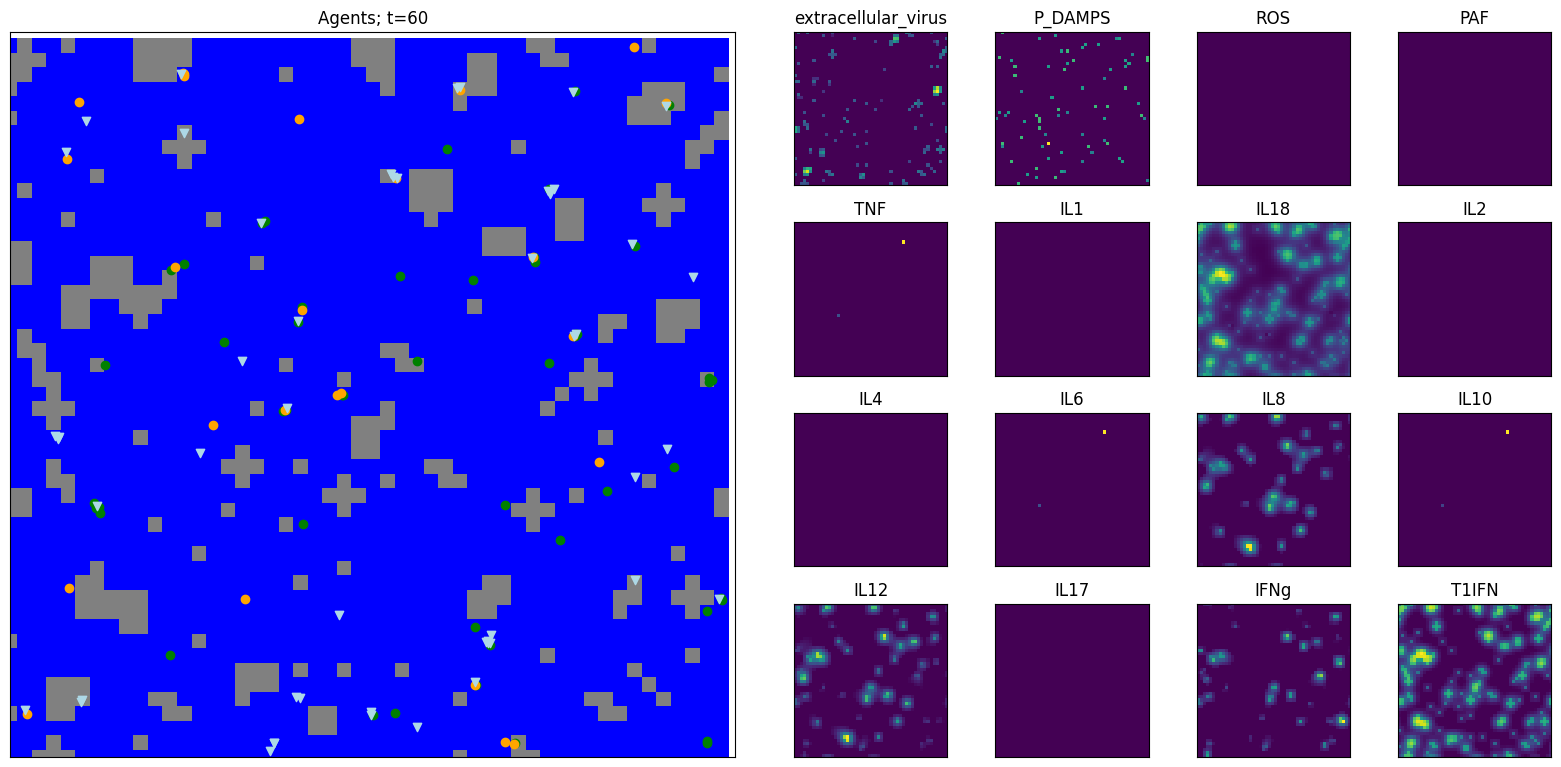

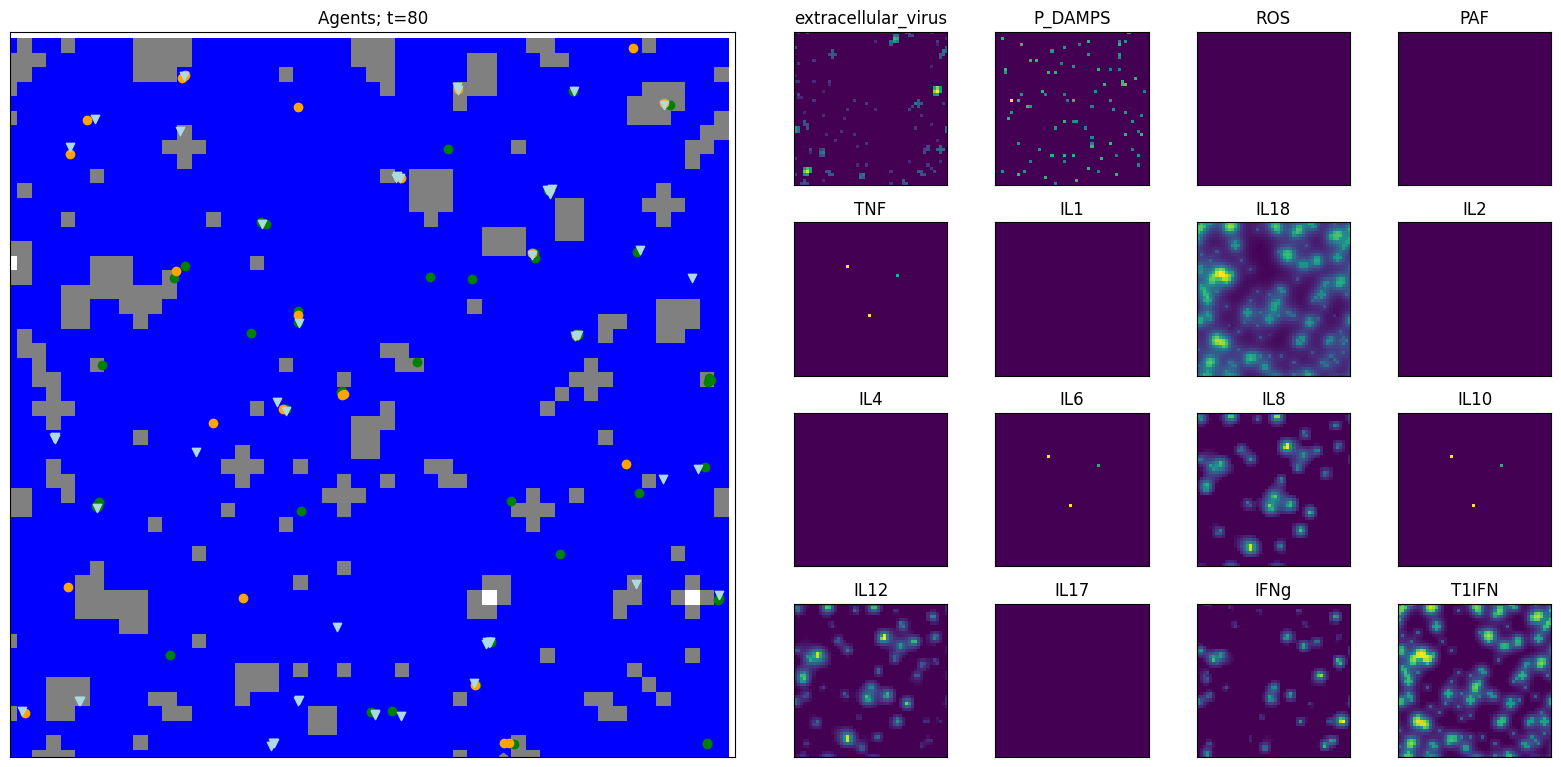

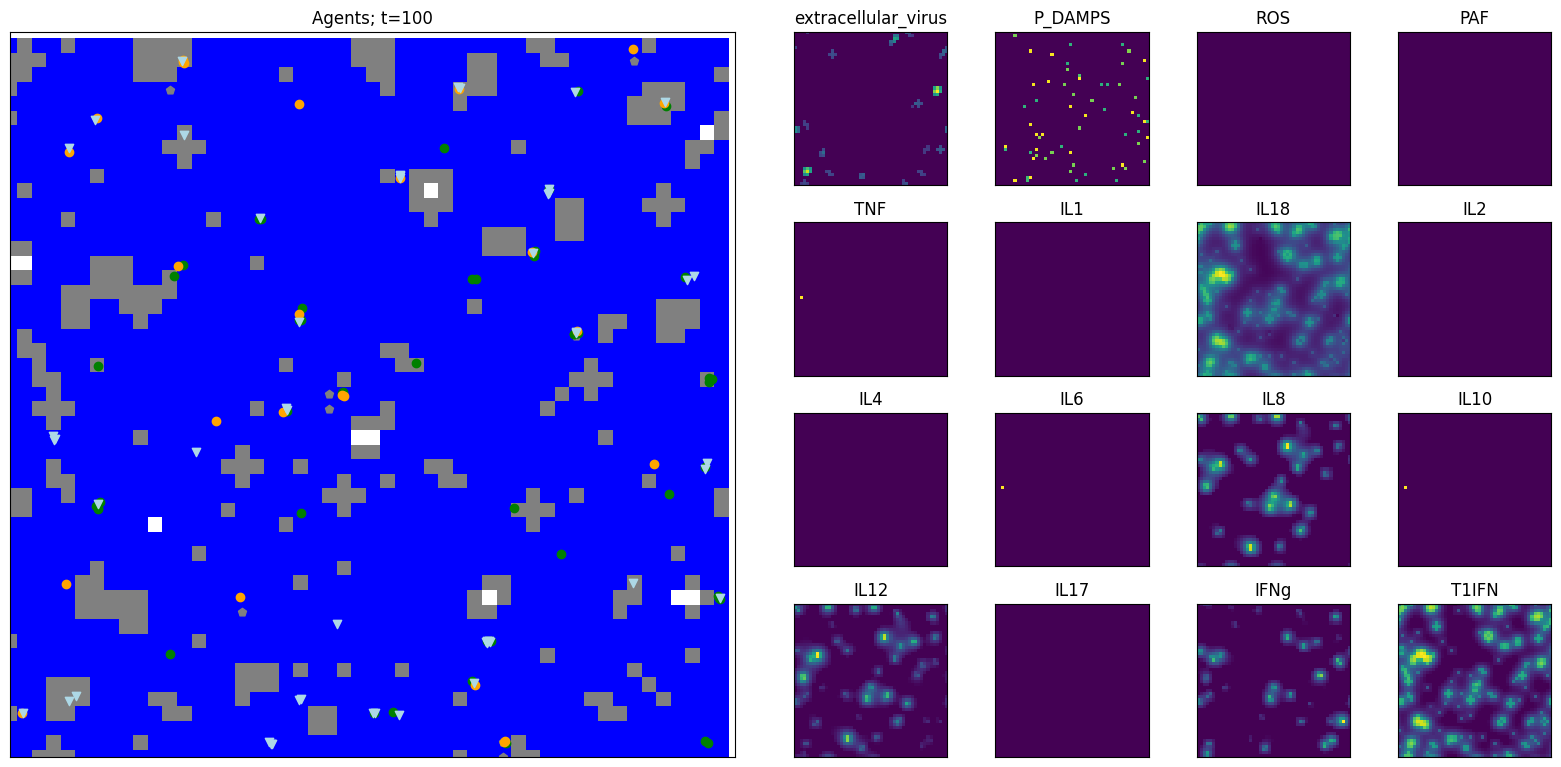

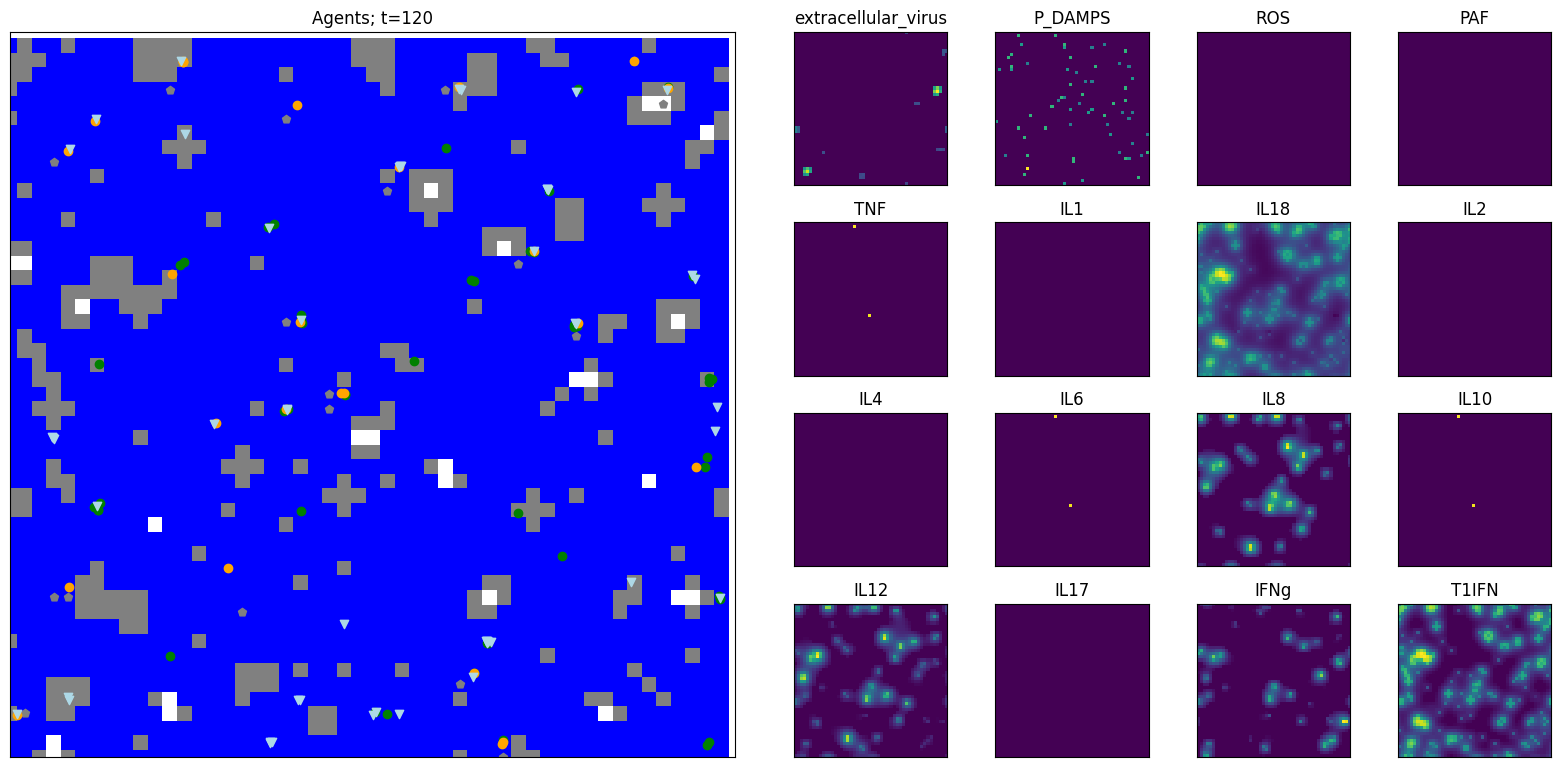

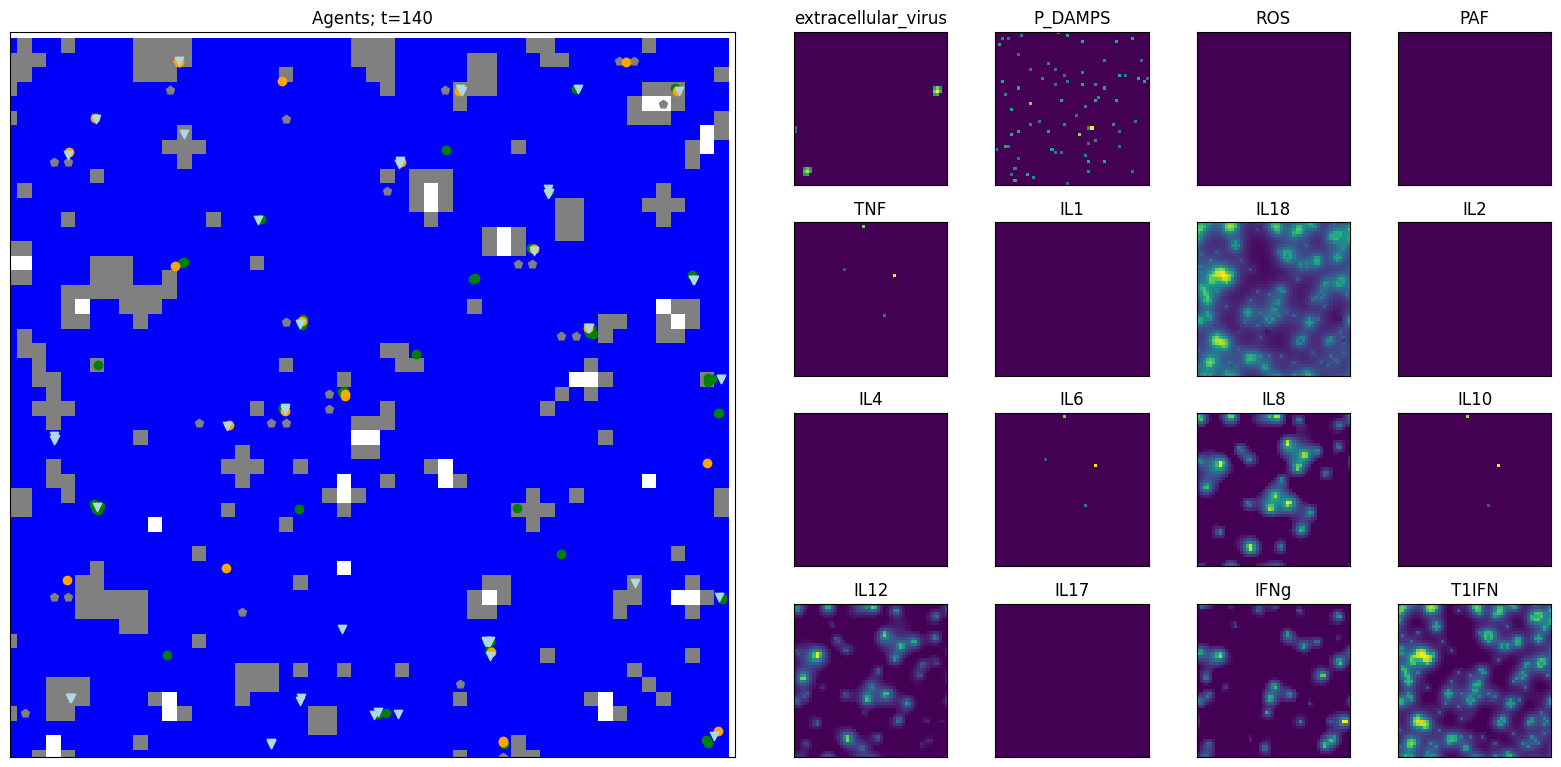

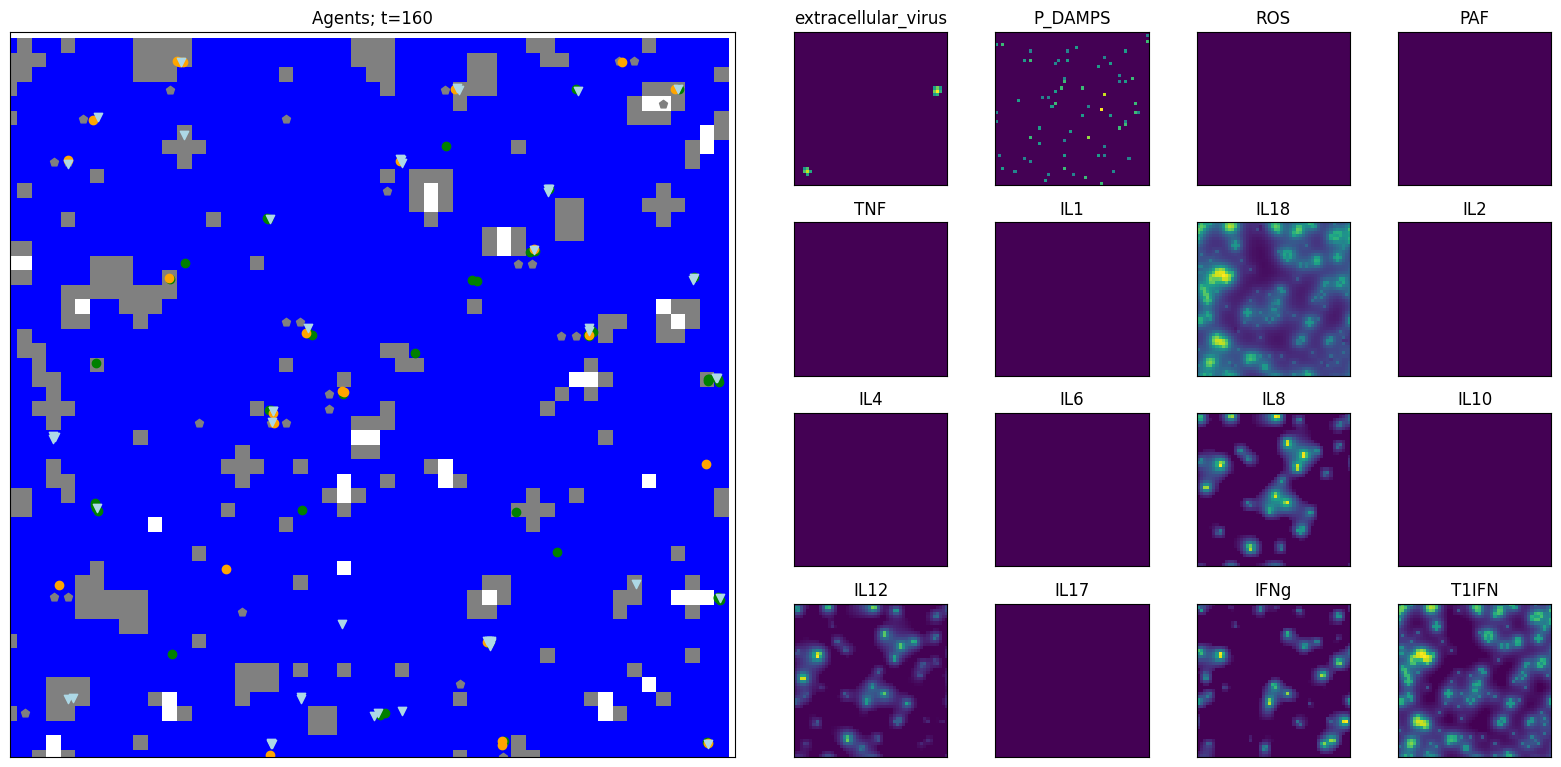

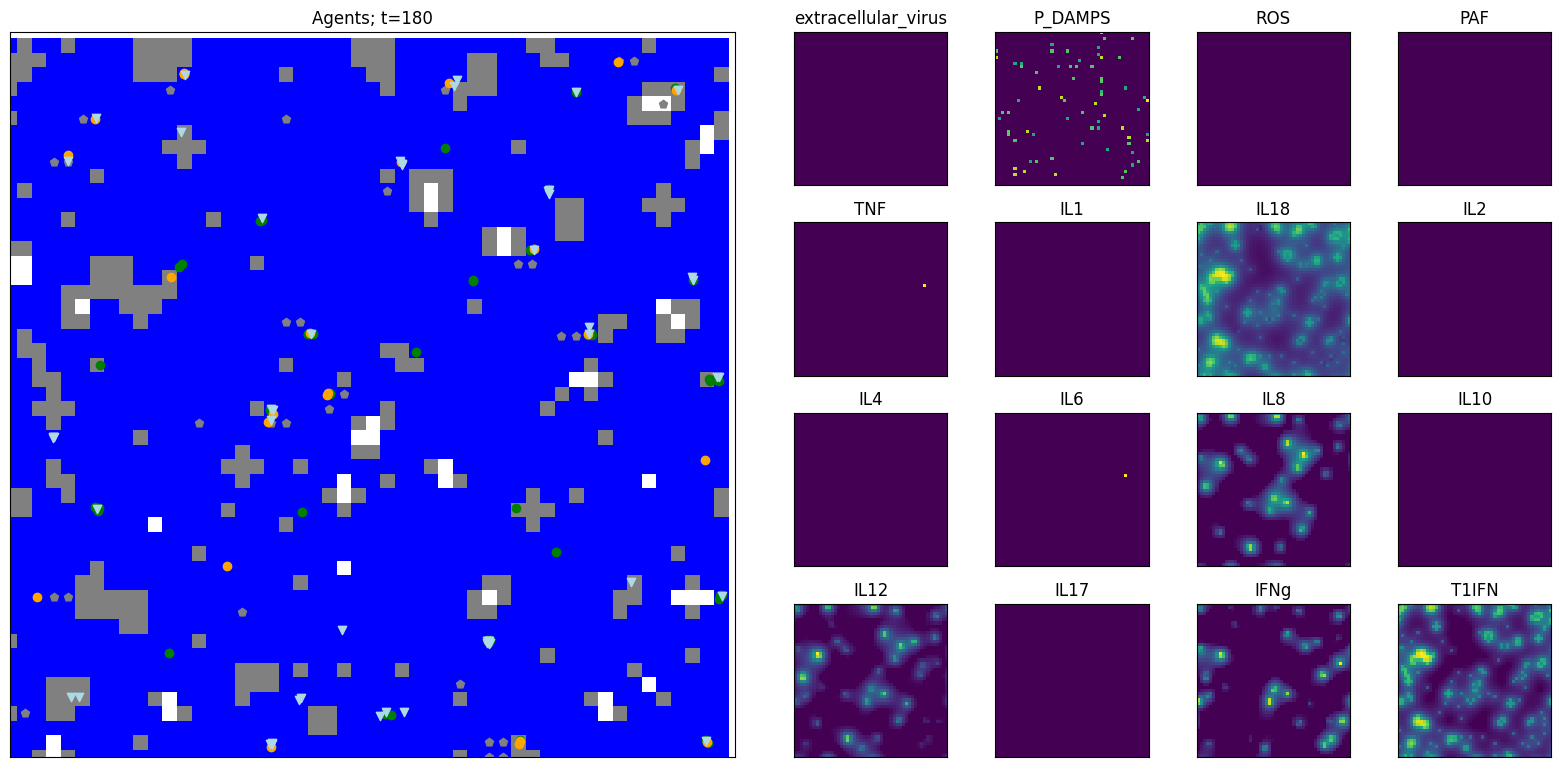

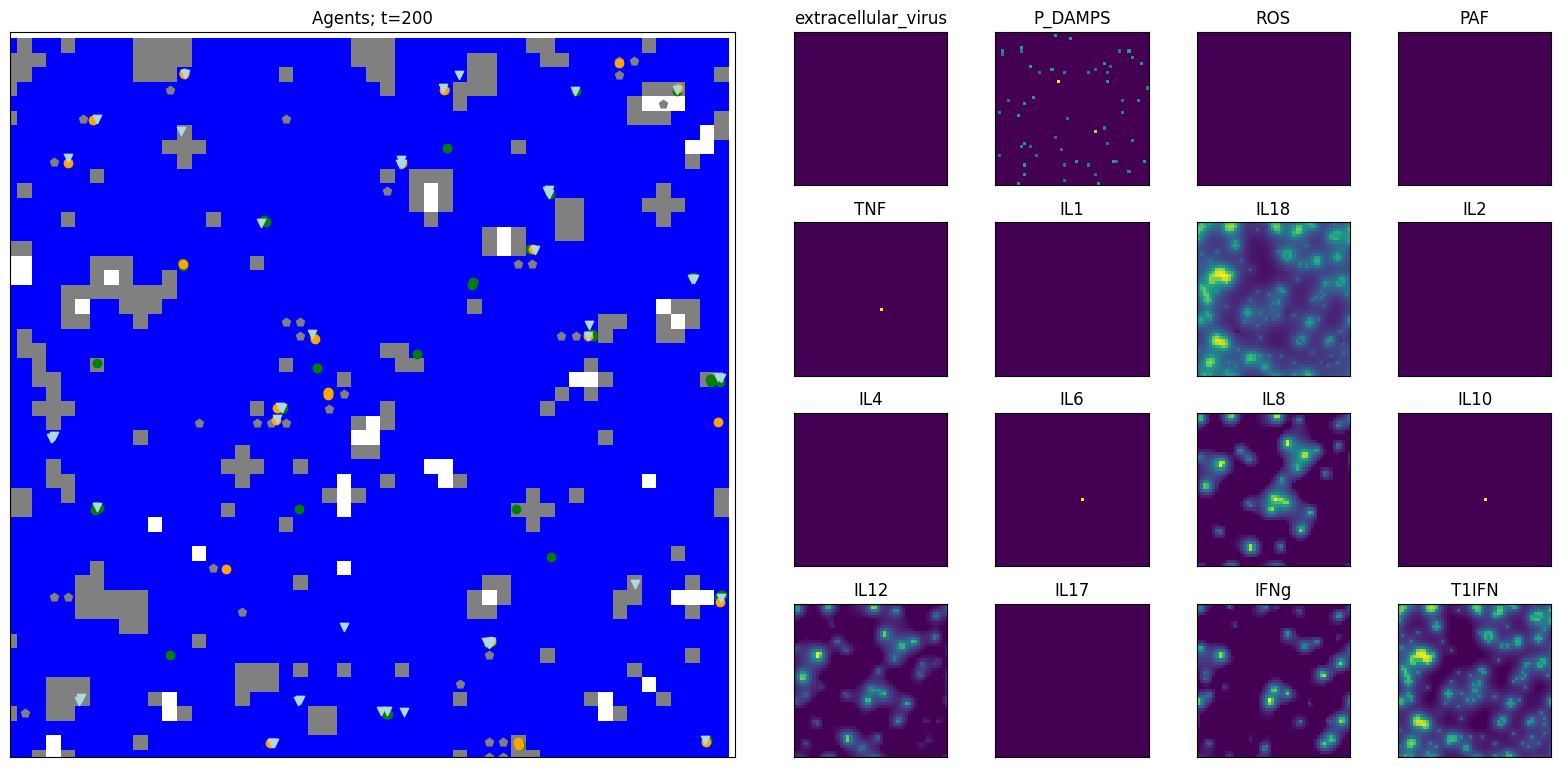

In [6]:
for _ in range(10):

    for __ in range(20):
        model.time_step()

    fig = plt.figure(layout='constrained', figsize=(16, 8))
    subfigs = fig.subfigures(1, 2, wspace=0.07)

    ax = subfigs[0].add_subplot()
    model.plot_agents(ax)
    ax.set_title(f'Agents; t={model.time}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect(1)
    
    axs = subfigs[1].subplots(4, 4)
    
    fields = [
        'extracellular_virus',
        'P_DAMPS',
        'ROS',
        'PAF',
        'TNF',
        'IL1',
        'IL18',
        'IL2',
        'IL4',
        'IL6',
        'IL8',
        'IL10',
        'IL12',
        'IL17',
        'IFNg',
        'T1IFN',
    ]

    for k, field in enumerate(fields):
        model.plot_field(axs[k // 4, k % 4], field_name=field)
        axs[k//4, k%4].set_title(field)
        axs[k//4, k%4].get_xaxis().set_visible(False)
        axs[k//4, k%4].get_yaxis().set_visible(False)
        axs[k//4, k%4].set_aspect(1)
    
    fig.tight_layout()
    fig.show()


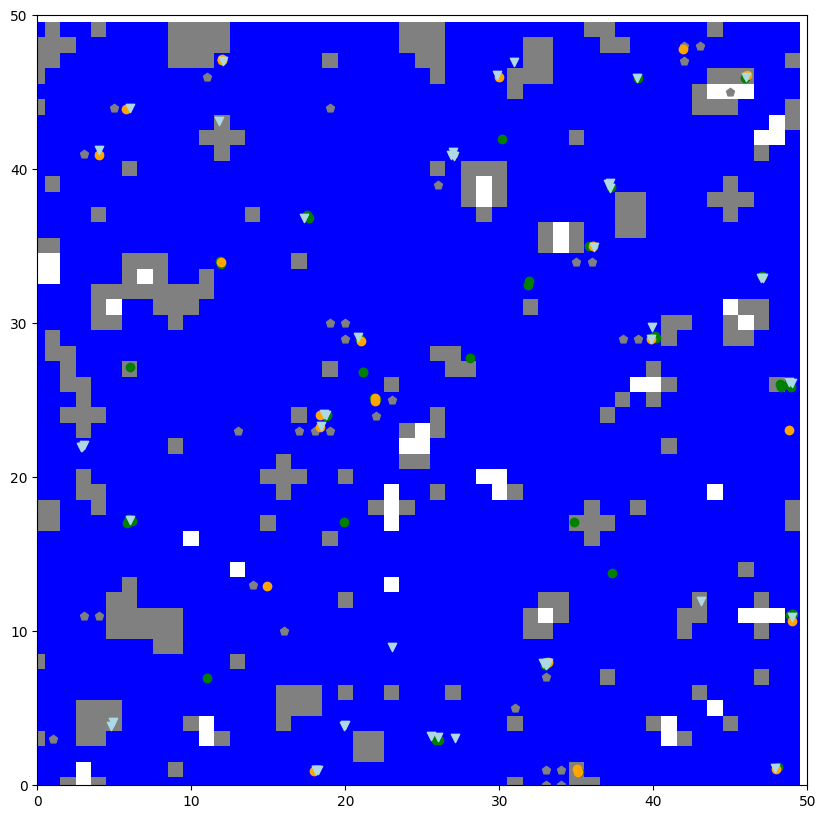

In [7]:
fig = plt.figure(figsize=(10,10))
ax=plt.gca()
model.plot_agents(ax)